## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Implementar K-means simples do zero

### Descrição

Implementar uma versão simples do K-means do zero. Por simples, deve-se entender que nenhuma das otimizações do K-means precisa ser implementada. Assume-se que deverá ser criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```

### Requisitos

* Criar método com nome `do_kmeans_clustering`, que receba um parâmetro `k`, um parâmetro `X` e um parâmetro `random_state`, representando número de clusters, dados e inteiro a ser usado como seed (para função `random`), respectivamente.
* O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais. O formato de retorno dos grupos finais é livre.
* Assuma que `X` terá shape `(num_instances, num_features)`, onde `n_features = 2`.
* Assuma que os centróides finais tenham shape `(k, num_features)`.
* Assuma que os clusters (labels) sejam uma lista de tamanho `num_instances`.
* A inicialização dos centróides dos clusters deve ser aleatória e baseada no `random_state`.
* O algoritmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
* Deve conter ao menos um método de plot para verificar os grupos finais em relação aos dados.
* A base de dados usada é sintética e para tal deve ser utilizado o método `make_blobs` do `sklearn.datasets.sample_generator`

## Implementação

### Imports
Utilizar bibliotecas que achar mais pertinente. Lembre-se dos detalhes do matplotlib e do seaborn para utilizá-los em notebooks (ver outros notebooks da aula).

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance

#from sklearn.cluster import KMeans

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética
Utilizar o método `make_blobs` do ScikitLearn com os parâmetros já fornecidos. Informar `random_state` como `100`

In [6]:
centers = 3
n_features = 2
n_samples = 300

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features,
                  random_state=100)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()


,x,y,label
0,-10.484464,-7.967902,2
1,-3.390763,7.077865,1
2,-10.357295,-8.706160,2
3,-8.150449,-7.964183,2
4,-9.039564,-6.777323,2


### Plotar a base de dados inicial
Dica: lembre-se que utilizamos o `sns.scatterplot` e utilizando o dataset como um Pandas dataframe. Caso tenham dúvidas, revise os notebooks da aula.

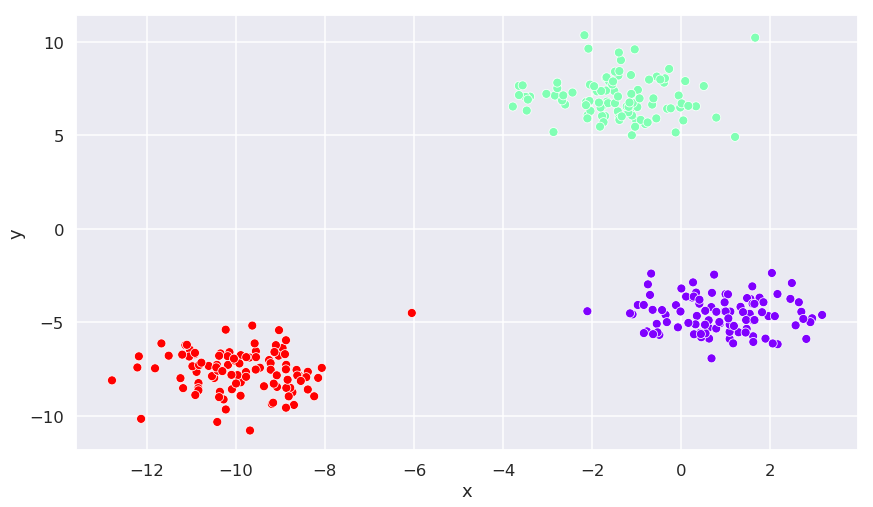

In [9]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### K-means

In [10]:
def do_kmeans_clustering(k, X, random_state):
    n_features = X.shape[1]
    
    C, c = make_blobs(n_samples=k, centers=k, n_features=n_features,random_state=random_state)
    centroids = C
    labels=np.full([X.shape[0]], -1)
    changed = True
    while changed:
        for x in range(X.shape[0]):
            d = np.inf
            label = -1
            for l in c:
                dist = distance.euclidean(centroids[l], X[x])
                if dist < d:
                    d = dist
                    label = l
            labels[x] = label
        #recalc centroids
        changed = False
        for l in c:
            points = []
            for x in range(X.shape[0]):
                if(labels[x]==l):
                    points.append(X[x])
            new_centroid = calc_centroid(np.asarray(points), centroids[l] ) 
            #print(centroids)
            #print(new_centroid)
            if distance.euclidean(centroids[l], new_centroid) > 0.1:
                centroids[l] = new_centroid
                changed = True
        
            
    return centroids, labels

def calc_centroid(A, centroid):
    if A.shape[0] == 0:
        return centroid
    length = A.shape[0]
    x = np.sum(A[:, 0])
    y = np.sum(A[:, 1])
    return x/length, y/length
    
      

### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [15]:
centroids, labels = do_kmeans_clustering(k=3,X=X,random_state=110)

### Plotar grupos resultantes

Utilizar dois métodos: `sns.scatterplot` para os dados e `plt.scatter` para os centróides. Caso tenha dúvidas, revise os exemplos dos notebooks da aula.

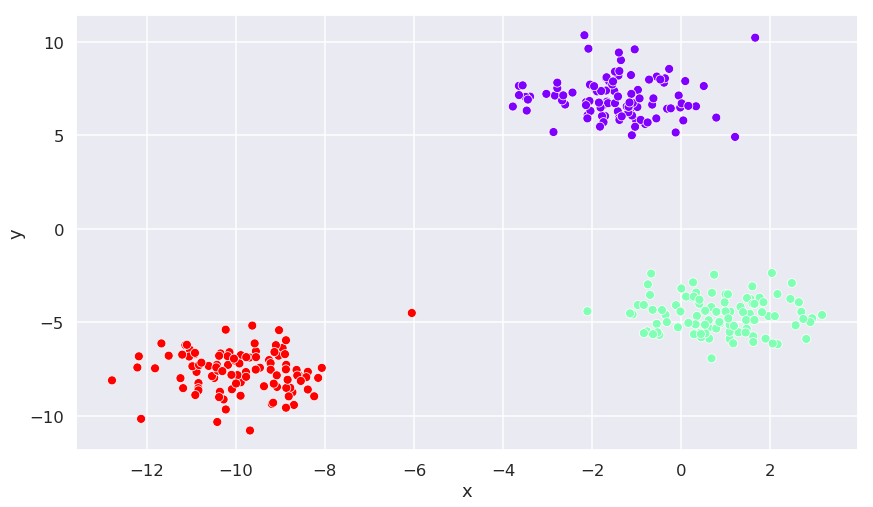

In [17]:
df['cluster_labels'] = labels

_ = sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels', palette='rainbow', legend=False)

### Pergunta

Após finalizar a implementação, faça testes com diferentes valores para o `random_state`. O que você pode observar?

R: K-Means é sensível a inicialização dos centróides. Temos que executar com vários valores e fazeruma avaliação qualitativa dos clusters gerados.